In [1]:
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.preprocessing import SplineTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline
import matplotlib
from matplotlib import pyplot as plt

#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

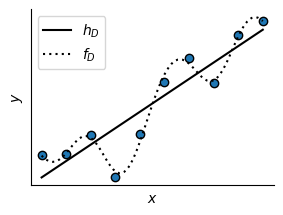

In [2]:
np.random.seed(20)
l = 0
r = 20
X = np.linspace(l, r, 10)
y = X + np.random.normal(0, np.max(X)//6, size=X.shape[0])

fig, ax = plt.subplots()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.scatter(X, y, marker='o', edgecolors='black')

h_D = LinearRegression()
Xb = np.stack((X, np.ones(X.shape[0])), axis=1)
h_D.fit(Xb, y)
ax.plot(X, h_D.predict(Xb), c='black', label='$h_D$')

f_D = make_pipeline(SplineTransformer(n_knots=8, degree=4), Ridge(alpha=1e-3))
f_D.fit(Xb, y)

xx = np.linspace(l, r, 100)
ax.plot(xx, f_D.predict(np.stack((xx, np.ones(xx.shape[0])), axis=1)), c='black', dashes=[1,2], label='$f_D$')
ax.legend()
#ws = 2.25 # 1.75
#hs = 1.75 # 1.25
ws = 1.95 # 1.75
hs = 1.55 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.savefig('ERM_plt.pgf', bbox_inches='tight', pad_inches=0)

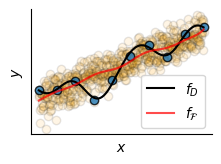

In [3]:
np.random.seed(20)
l = 0
r = 20
X_D = np.linspace(l, r, 500)
y_D = X_D + np.random.normal(0, np.max(X_D)//6, size=X_D.shape[0])

fig, ax = plt.subplots()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.scatter(X_D, y_D, marker='o', edgecolors='black', c='orange', alpha=0.1)
ax.scatter(X, y, marker='o', edgecolors='black', alpha=0.8)

h_H = LinearRegression()
Xbd = np.stack((X_D, np.ones(X_D.shape[0])), axis=1)
h_H.fit(Xbd, y_D)
#ax.plot(X, h_D.predict(Xb), c='black', label='$h_D$')
#ax.plot(X_D, h_H.predict(Xbd), c='red', label='$h_\mathcal{H}$')

f_F = make_pipeline(SplineTransformer(n_knots=8, degree=4), Ridge(alpha=1e-3))
f_F.fit(Xbd, y_D)

xx = np.linspace(l, r, 100)
ax.plot(xx, f_D.predict(np.stack((xx, np.ones(xx.shape[0])), axis=1)), c='black', label='$f_D$')
ax.plot(xx, f_F.predict(np.stack((xx, np.ones(xx.shape[0])), axis=1)), c='red', label='$f_\mathcal{F}$', alpha=0.7)
ax.legend()
ws = 2.45
hs = 2.15
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.savefig('risk_f.pgf', bbox_inches='tight', pad_inches=0)

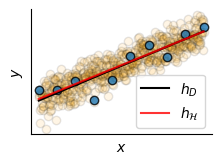

In [4]:
np.random.seed(20)
l = 0
r = 20
X_D = np.linspace(l, r, 500)
y_D = X_D + np.random.normal(0, np.max(X_D)//6, size=X_D.shape[0])

fig, ax = plt.subplots()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.scatter(X_D, y_D, marker='o', edgecolors='black', c='orange', alpha=0.1)
ax.scatter(X, y, marker='o', edgecolors='black', alpha=0.8)

h_H = LinearRegression()
Xbd = np.stack((X_D, np.ones(X_D.shape[0])), axis=1)
h_H.fit(Xbd, y_D)
ax.plot(X, h_D.predict(Xb), c='black', label='$h_D$')
ax.plot(X_D, h_H.predict(Xbd), c='red', label='$h_\mathcal{H}$', alpha=0.8)

#f_F = make_pipeline(SplineTransformer(n_knots=8, degree=4), Ridge(alpha=1e-3))
#f_F.fit(Xbd, y_D)
#
#xx = np.linspace(l, r, 100)
#ax.plot(xx, f_D.predict(np.stack((xx, np.ones(xx.shape[0])), axis=1)), c='black', label='$f_D$')
#ax.plot(xx, f_F.predict(np.stack((xx, np.ones(xx.shape[0])), axis=1)), c='purple', label='$f_\mathcal{F}$')
ax.legend()
ws = 2.45
hs = 2.15
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.savefig('risk_h.pgf', bbox_inches='tight', pad_inches=0)